In [74]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt

In [75]:
cwd = os.getcwd()
current_folder = cwd.split('\\')[-1]
print(current_folder)
if current_folder != 'BFOR-516-Project':
    os.chdir('..')
    cwd = os.getcwd()
current_folder = cwd.split('\\')[-1]
print(current_folder)
cwd

BFOR-516-Project
BFOR-516-Project


'C:\\Users\\jacks\\Documents\\GitHub\\BFOR-516-Project'

In [76]:
data = pd.read_csv('data/datafm20.csv')

In [77]:
data['log_wage'] = np.log(data['Wage']+1)
data['log_value'] = np.log(data['Value']+1)
'''data = pd.concat([data, pd.get_dummies(data['Nation'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Preferred Foot'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Best Pos'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Best Role'])], axis=1)'''
data['Nation_dummy'] =pd.Categorical(data['Nation']).codes
data['preferred_Foot_dummy'] =pd.Categorical(data['Preferred Foot']).codes
data['Best_Pos_dummy'] =pd.Categorical(data['Best Pos']).codes
data['Best_Role_dummy'] =pd.Categorical(data['Best Role']).codes

Top 10 leagues Primera División, Brasileirão, Süper Lig, Primeira Liga, Eredivisie, Ligue 1, Serie A, Bundesliga, LaLiga, and English Premier League from https://soccermodo.com/best-soccer-leagues-in-the-world/

In [78]:
top_10_leagues = ['Spanish First Division', 'Italian Serie A', 'Ligue 1 Conforama', 'Bundesliga', 'English Premier Division',
              'Argentine Premier Division', 'Brazilian National First Division', 'Eredivisie', 'Turkish Super League',
              'Portuguese Premier League']

In [79]:
data['top_league'] = np.where(data['Division'].isin(top_10_leagues), 1, 0)

In [80]:
data.loc[data['top_league'] == 1]

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,Agg,Aer,Acc,log_wage,log_value,Nation_dummy,preferred_Foot_dummy,Best_Pos_dummy,Best_Role_dummy,top_league
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,7,2,18,13.997833,18.105970,6,1,2,21,1
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,6,2,15,13.764218,17.249498,154,0,11,9,1
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,6,4,20,12.834684,18.269858,65,3,11,1,1
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,8,14,13,12.429220,17.599700,71,0,7,33,1
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,10,4,17,13.304687,18.326370,26,3,1,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139568,Madu,"AM (R), ST (C)",FamalicÃ£o,Portuguese Premier League,Portugal (Premier League),POR,182,67,16,Left Only,...,8,4,13,4.025352,6.216606,154,2,2,22,1
140030,Riccardo Bellucci,ST (C),Sampdoria,Italian Serie A,Italy (Serie A),ITA,177,64,16,Right Only,...,11,2,12,5.398163,8.476580,94,4,11,28,1
140118,Amadou TraorÃ©,M/AM (C),Sassuolo,Italian Serie A,Italy (Serie A),GUI,173,61,16,Right Only,...,11,3,7,5.398163,8.294300,80,4,0,3,1
140315,Resul Sungur,M (C),Hatayspor,Turkish Super League,Turkey (Super League),TUR,194,83,20,Right Only,...,7,2,13,4.564348,6.165418,197,4,8,10,1


In [81]:
int_list = []
pred_vars = []

for i in data.columns:
    if 'int' in str(data[i].dtypes) or 'float' in str(data[i].dtypes):
        if 'uint' not in str(data[i].dtypes):
            int_list.append(i)
        if i != 'CA' and i !='PA' and i != 'Wage' and i != 'Value' and i != 'top_league':
            pred_vars.append(i)

In [82]:
corr = data[int_list].corr()
corr.style.background_gradient(cmap='coolwarm')

,Height,Weight,Age,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,log_wage,log_value,Nation_dummy,preferred_Foot_dummy,Best_Pos_dummy,Best_Role_dummy,top_league
Height,1.000000,0.790270,0.048629,0.021120,0.024942,0.076890,0.059560,-0.141420,-0.192301,0.272584,-0.292641,-0.008698,-0.019366,0.360370,-0.105444,0.282027,0.303359,0.279315,0.229945,-0.067279,-0.137968,-0.232315,0.282575,-0.241078,0.017983,0.025868,-0.070726,-0.215612,0.054739,0.288263,0.769151,0.139777,0.303184,-0.074850,-0.236316,-0.297125,-0.178392,0.162173,-0.288349,0.020050,0.084630,-0.298818,-0.240485,0.127001,-0.028173,0.283253,0.290370,0.235186,0.092150,0.089000,-0.243586,0.032998,0.327978,-0.262820,0.035050,0.032722,0.015200,0.083608,0.046178,-0.063001,0.014035
Weight,0.790270,1.000000,0.274063,0.049281,0.058936,0.249639,0.161103,0.008743,-0.063505,0.249706,-0.158673,0.165080,0.051282,0.551687,0.062155,0.233436,0.250476,0.232060,0.326303,0.087870,-0.021370,-0.234372,0.254992,-0.092786,-0.041850,0.106106,0.063888,-0.071271,0.141025,0.248535,0.694555,0.231907,0.249714,0.056031,-0.138915,-0.191685,-0.069524,0.158504,-0.165969,0.053931,0.097234,-0.164049,-0.107743,0.277984,0.138192,0.254347,0.253600,0.348554,0.282753,0.256208,-0.215178,0.073557,0.275978,-0.271931,0.086964,0.058074,-0.018816,0.047859,0.050087,-0.052697,-0.021138
Age,0.048629,0.274063,1.000000,0.040546,0.073089,0.296342,0.092173,0.235134,0.173740,0.050242,0.127561,0.330482,0.086274,0.379263,0.315064,0.018469,0.006307,0.019915,0.243485,0.309101,0.156565,-0.145307,0.048038,0.196127,-0.004369,0.123241,0.232615,0.190034,0.303110,0.023570,0.151741,0.156826,0.009398,0.241828,0.145065,0.055901,0.115485,0.057289,0.107136,0.084557,0.012726,0.168790,0.172092,0.340873,0.310602,0.050252,0.033244,0.286951,0.335420,0.350986,-0.064017,0.107875,0.028374,-0.195395,0.027583,-0.090926,-0.043206,-0.048324,0.007267,0.035770,-0.135740
Value,0.021120,0.049281,0.040546,1.000000,0.763292,0.326957,0.286218,0.178467,0.177202,0.004797,0.169782,0.208125,0.078166,0.166927,0.177811,-0.003040,-0.005287,-0.008685,0.100763,0.183799,0.176875,0.128165,0.005524,0.154641,0.076975,0.066055,0.104486,0.155860,0.069209,-0.001638,0.082608,0.097222,-0.008642,0.156182,0.136361,0.145076,0.129317,0.008712,0.151187,0.097741,0.105903,0.142231,0.133609,0.188301,0.215416,0.001132,-0.001887,0.163199,0.212499,0.205335,0.130989,0.071993,-0.005238,0.101920,0.270435,0.243476,-0.029888,-0.058626,-0.014202,-0.019273,0.310380
Wage,0.024942,0.058936,0.073089,0.763292,1.000000,0.306466,0.270332,0.161506,0.164798,0.010082,0.158015,0.199219,0.071789,0.164677,0.164583,0.001683,0.000324,-0.004923,0.098836,0.180503,0.165641,0.107111,0.012312,0.142671,0.068988,0.060405,0.105603,0.147875,0.075424,0.002603,0.084804,0.097449,-0.002833,0.153742,0.126871,0.133886,0.121339,0.015235,0.136399,0.092806,0.099960,0.131787,0.127897,0.181935,0.207909,0.007815,0.004356,0.159950,0.206039,0.200642,0.113288,0.066046,0.000205,0.077994,0.282082,0.218056,-0.027981,-0.059822,-0.010300,-0.017839,0.247297
CA,0.076890,0.249639,0.296342,0.326957,0.306466,1.000000,0.859521,0.581409,0.561502,0.073998,0.531869,0.709459,0.298931,0.623386,0.567241,-0.009060,0.001791,-0.012333,0.475408,0.543884,0.601253,0.269658,0.060882,0.492931,0.079361,0.317486,0.479528,0.521084,0.223545,0.030932,0.330086,0.395560,-0.002178,0.560957,0.349731,0.430831,0.379396,0.048916,0.458322,0.184661,0.290213,0.486116,0.524601,0.663173,0.662044,0.045140,0.029239,0.555406,0.723519,0.687894,0.302087,0.140309,0.010254,0.188974,0.574260,0.552499,-0.080797,-0.184404,-0.073240,-0.014700,0.231834
PA,0.059560,0.161103,0.092173,0.286218,0.270332,0.859521,1.000000,0.485905,0.509560,0.067196,0.490375,0.602679,0.264767,0.509762,0.433355,-0.004851,0.006144,-0.009872,0.390118,0.469681,0.552309,0.215659,0.057120,0.414957,0.070558,0.261362,0.398674,0.464093,0.141624,0.032341,0.2771

In [83]:
corr2 = corr[['top_league']]
corr2.style.background_gradient(cmap='coolwarm')

,top_league
Height,0.014035
Weight,-0.021138
Age,-0.135740
Value,0.310380
Wage,0.247297
CA,0.231834
PA,0.304897
Wor,0.113847
Vis,0.127275
Thr,0.023271


In [84]:
len(pred_vars)

56

In [85]:
from sklearn.model_selection import train_test_split

# use index-based sampling since we have time series data
train, test = train_test_split(data, test_size=0.4, shuffle=True)

In [86]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(train[pred_vars], train['top_league'])

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [144]:
rf = ensemble.RandomForestClassifier(n_estimators=200)
rf.fit(train[pred_vars], train['top_league'])

RandomForestClassifier(n_estimators=200)

In [124]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500, n_iter_no_change=20)
mlp.fit(train[pred_vars], train['top_league'])

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500, n_iter_no_change=20)

In [150]:
'''
vch = ensemble.VotingClassifier(estimators=[
        ('dtree', dtree), ('rf', rf), ('mlp', mlp)], voting='hard')
vch.fit(train[pred_vars], train['top_league'])
'''

vcs = ensemble.VotingClassifier(estimators=[
        ('dtree', dtree), ('rf', rf), ('mlp', mlp), ('abc', abc)], voting='soft', weights=[1.11, 1, 2, .9])
vcs.fit(train[pred_vars], train['top_league'])

VotingClassifier(estimators=[('dtree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10)),
                             ('rf', RandomForestClassifier(n_estimators=200)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(20, 20),
                                            max_iter=500,
                                            n_iter_no_change=20)),
                             ('abc', AdaBoostClassifier())],
                 voting='soft', weights=[1.11, 1, 2, 0.9])

In [89]:
nb = GaussianNB()
nb.fit(train[pred_vars], train['top_league'])

GaussianNB()

In [90]:
lr = LogisticRegression()
lr.fit(train[pred_vars], train['top_league'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier()
knr.fit(train[pred_vars], train['top_league'])

KNeighborsClassifier()

In [92]:
abc = ensemble.AdaBoostClassifier()
abc.fit(train[pred_vars], train['top_league'])

AdaBoostClassifier()

In [93]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber')
sgd.fit(train[pred_vars], train['top_league'])

SGDClassifier(loss='modified_huber')

In [151]:
# list of our models
fitted = [dtree, rf, mlp, nb, lr, vcs, abc] #took svc out, and knr, sgd

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['top_league'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['top_league'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['top_league'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['top_league'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
GaussianNB
LogisticRegression
VotingClassifier
AdaBoostClassifier


In [152]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.0036396214793661457, 0.003751609832577...","[0.0, 0.10617626648161, 0.1339347675225538, 0....",0.899224,0.429139,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 1.8664725535211005e-05, 1.8664...","[0.0, 0.0002313208420078649, 0.000462641684015...",0.946245,0.142837,precision recall f1-score ...
MLPClassifier,"[0.0, 0.0, 0.0, 1.8664725535211005e-05, 1.8664...","[0.0, 0.0002313208420078649, 0.000925283368031...",0.934831,0.153334,precision recall f1-score ...
GaussianNB,"[0.0, 3.732945107042201e-05, 3.732945107042201...","[0.0, 0.0016192458940550544, 0.002544529262086...",0.752556,1.167488,precision recall f1-score ...
LogisticRegression,"[0.0, 0.0, 0.0, 1.8664725535211005e-05, 1.8664...","[0.0, 0.0002313208420078649, 0.010872079574369...",0.887364,0.183170,precision recall f1-score ...
VotingClassifier,"[0.0, 0.0, 0.0, 1.8664725535211005e-05, 1.8664...","[0.0, 0.0002313208420078649, 0.002544529262086...",0.953212,0.195752,precision recall f1-score ...
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.8664725535211005e-...","[0.0, 0.0002313208420078649, 0.001387925052047...",0.937718,0.649079,precision recall f1-score ...


In [153]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     53577
           1       0.68      0.52      0.59      4323

    accuracy                           0.95     57900
   macro avg       0.82      0.75      0.78     57900
weighted avg       0.94      0.95      0.94     57900

Model log loss: 0.4291391355208915

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53577
           1       0.81      0.35      0.49      4323

    accuracy                           0.95     57900
   macro avg       0.88      0.67      0.73     57900
weighted avg       0.94      0.95      0.94     57900

Model log loss: 0.14283661154893026

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     53577
           1       0.61  

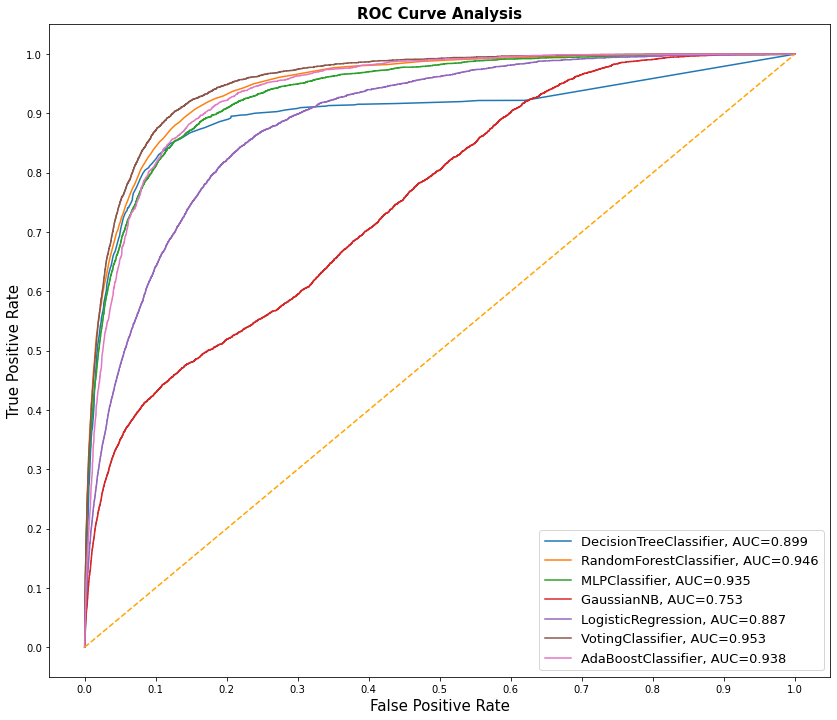

In [154]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

DecisionTreeClassifier


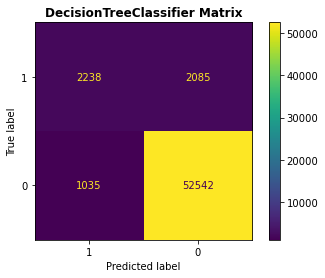

In [99]:
predicted = dtree.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(dtree, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
plt.title('DecisionTreeClassifier Matrix', fontweight='bold')
print('DecisionTreeClassifier')
plt.show()

RandomForestClassifier


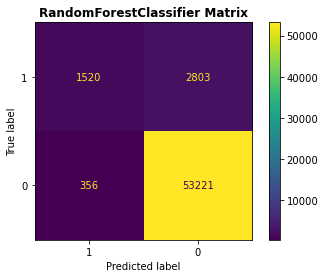

In [149]:
predicted = rf.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(rf, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('RandomForestClassifier')
plt.title('RandomForestClassifier Matrix', fontweight='bold')
plt.show()

MLPClassifier


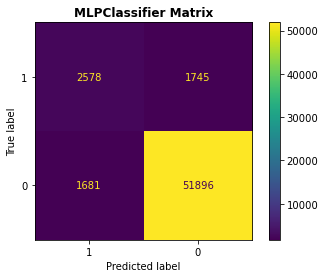

In [130]:
predicted = mlp.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(mlp, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
plt.title('MLPClassifier Matrix', fontweight='bold')
print('MLPClassifier')
plt.show()

GaussianNB


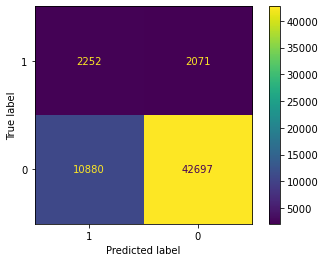

In [102]:
predicted = nb.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(nb, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('GaussianNB')
plt.show()

LogisticRegression


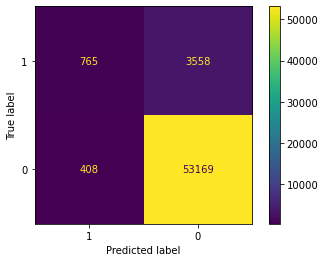

In [103]:
predicted = lr.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(lr, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('LogisticRegression')
plt.show()

Voting Classifier Soft


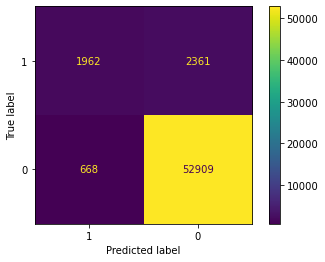

In [155]:
predicted = vcs.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(vcs, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('Voting Classifier Soft')
plt.show()

knr Classifier Soft


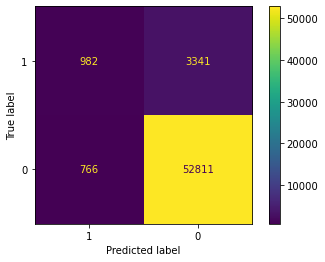

In [106]:
predicted = knr.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(knr, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('knr Classifier Soft')
plt.show()

AdaBoostClassifier


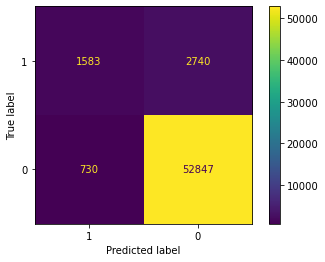

In [107]:
predicted = abc.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(abc, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('AdaBoostClassifier')
plt.show()